# Lab Assignment 4

## Heather Napthine, s2065896



## Task 1 (5 marks)

Give your implementation of the `plot_approx` and `approx_fourier` functions from Lab 4.

Use them to produce a plot of a Fourier series approximation of the function defined by

$$
f(x)=\left\{\begin{array}{ll}
-\frac{1}{2} x & -2 \leq x<0 \\
2 x-\frac{1}{2} x^2 & 0 \leq x<2
\end{array} \quad f(x+4)=f(x)\right.
$$

using the first 10 terms of the Fourier series.

Also include a piecewise plot of $f(x)$ for a single interval of periodicity.

In [1]:
#Import the required modules.
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

#Define the symbols.
x,n = sym.symbols('x, n')

#Define the approx_fourier function.
def approx_fourier(f, L, num_terms):   
    
    '''
    takes in a function and returns the Fourier series with num_terms terms, 
    for the function with period 2L that matches f on  [−𝐿,𝐿] .
    
    inputs:
        f: the given function.
        L: half the period, T.
        num_terms: the number of terms calculated using our Fourier series.
    outputs:
        f_approx_eval: the Fourier series approximation of f evaluated to num_terms terms. 
    '''
    #Calculate the co-effecients using the Euler-Fourier formulae.
    a0 = sym.integrate(f, (x, -L, L))/L
    an = sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L))/L
    bn = sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L))/L
    
    #Determine the Fourier series approximation of f.
    f_approx = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L)+bn*sym.sin(n*sym.pi*x/L), (n,1,num_terms))
    
    #Evaluate the terms in our approximation.
    f_approx_eval = f_approx.doit()
    
    return f_approx_eval

#Define the plot_approx function.
def plot_approx(f, L, num_terms):

    '''
    takes in a function and returns the Fourier series with num_terms terms, 
    for the function with period 2L that matches f on  [−𝐿,𝐿] .
    
    inputs:
        f: the given function.
        L: half the period, T.
        num_terms: the number of terms calculated using our Fourier series.
    outputs:
        none (instead produces the plot, fourierplot, of f and its Fourier series). 
    '''
    #Plot the Fourier approximation over the interval [-2*L, 2*L]
    #and the function f over the interval [-L, L].
    fourierplot = sym_plot.plot((approx_fourier(f, L, num_terms),(x,-2*L,2*L)), (f,(x,-L,L)), show  = False)
    
    #Alter line colours to make plot easy to read.
    fourierplot[0].line_color = "blue"
    fourierplot[1].line_color = "red"
    
    #Show plot
    fourierplot.show()

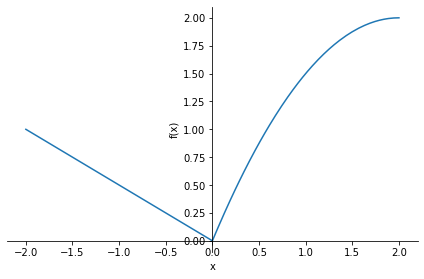

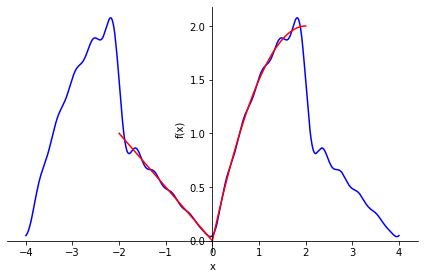

In [2]:
#Define the piecewise function, f.
f = sym.Piecewise((2*x-(x**2)/2, (x>=0)), (-x/2, (x<0)))

#Produce a piecewise plot of f(x) for a single interval of periodicity [-L, L].
sym_plot.plot(f, (x,-2,2))

#Produce a plot of a Fourier series approximation of f, using the first 10 terms of the Fourier series.
plot_approx(f, 2, 10)

## Task 2 (5 marks)

Solve Exercise $3.1$ from Lab 4 , but with the initial condition

$$
u(x, 0)=f(x)= \begin{cases}1 & L / 2-1<x<L / 2+1 \\ 0 & \text { otherwise. }\end{cases}
$$

Note that to ensure the code runs in reasonable time, you should use $L=10$ and run the animation for $0 \leq t \leq 20$, with only 2 frames per second. You should use at least 200 terms of the series solution in order to obtain a good approximation.
Describe the behaviour of the solution.

In [7]:
#Import the required modules.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#Sets a, L and defines our piecewise function, f.
L = 10
a = 1
f = sym.Piecewise((0, (x<=(L/2 - 1))), (1, (x<(L/2 + 1))), (0, (x>=(L/2 + 1))))                 

#Determines the coeffecients, cn.
cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))

#Defines the symbol t.
t = sym.symbols('t')

#Determine the first ten terms of the Fourier series approximation.
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,200))

#Sets the number of frames per second.
fps = 2 

#Creates our plot.
fig, ax = plt.subplots()

#Create an array of 200 values at which to calulate the series solution and use to create the plot.
x_vals = np.linspace(0,L,200)

#Convert our SymPy expression to a function that can be used with NumPy.
u = sym.lambdify([x, t], u_symbolic, modules='numpy')

#Plot the solution in a black line.
line, = ax.plot(x_vals, u(x_vals,0), 'k-')

#Add the unchanging initial solution in red dashes.
plt.plot(x_vals,u(x_vals,0),'r:')

#Set axes labels and limits.
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.2,1.4)

#Close the plot to prevent a second plot being produced.
plt.close()

#Sets the location of the time annotation.
txt = ax.text(0.5, 0.8, 't=0')

#Define the initial_line function.
def initial_line():
    '''
    defines a funciton to draw the first frame.
    
    inputs:
        none
    outputs:
        line,: a tuple with only one item; the starting solution in it. 
    '''
    #Set the starting y data.
    line.set_ydata(u(x_vals,0))
    
    return line,

def animate(i):
    '''
    defines a funciton to update the data with each frame.
    
    inputs:
        i: value that allows us to calulate u(x,t) at t = i/fps, (where we note i
           will be given below by the argument frames in animation.FuncAnimation()).
    outputs:
        line,: a tuple with the solutions calculated at each x in x_vals in it. 
        txt: a string specifying the current time.
    '''
    #Updates the y data.
    line.set_ydata(u(x_vals,i/fps))
    
    #Updates the time annotation.
    txt.set_text('t='+str(i/fps))
    
    return line, txt

#Create the animation on our figure using the functions produced by animate(i).
#The first argument of animate will be the next value in frames. 
#The animation is created using 40 frames, spanning 20 seconds, beginning from our initial_line solution.
#The interval is set at 100ms per frame to slow the animation down.
#We set blit to True to leave the background unchanged and repeat to be False so that the animation plays once only.
ani = animation.FuncAnimation(fig, animate, np.arange(1, fps*40), initial_line,
                              interval=100, blit=True, repeat=False)

#Display the animation.
from IPython.display import HTML
HTML(ani.to_jshtml())

We observe that the maximum initial displacement is positive, while at t = 10, a half-period later, the maximum displacement is negative. The string then retraces its motion and returns to its original configuration at t = 20. The plots confirm that the motion is indeed periodic with period 20.

## Submission instructions

After producing the animation (as in the lab), you should also use the following line of code to produce an mp4 file of your animation. The file should then appear alongside the .ipynb file in your Jupyter file list. Note, if you are not using noteable, you will need to install ffmpeg. You can see this page for instructions https://ffmpeg.org/.

In [8]:
ani.save('hdeq_lab4_task2.mp4', writer='ffmpeg', fps=20)

Alternatively, you can use the code 

In [ ]:
ani.save('hdeq_lab4_task2.gif', writer='Pillow ', fps=20)

To save the simulation as a gif. Upload four files on gradsecope the .pdf, the .ipynb, the .py and the .mp4 (or .gif).